<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

# Exploratory Computing with Python
*Developed by Mark Bakker and David Steffelbauer*

## Notebook 12: Nonlinear regression

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In this Notebook, we learn how to fit more complicated models to a set of data. We discuss the problem of overfitting by fitting polynomials of different degrees to the data, and we learn how to fit arbitrary functions.

### Exercise 1. Fit a polynomial
First, write a function that takes two input arguments: an array of fitted values and an array of observed values, and returns the root mean squared error. This function will be used throughout this Notebook.

Next, use the $x,y$ values of 30 data points from the file `xydatafit.dat`. First fit a straight line through the data using the `np.polyfit` function by setting the degree of the polynomial to 1 (this should give the same answer as the `linregress` function). Plot the data and the fitted line. Report the root mean squared error in the legend of the graph (use the `label` keyword to specify the legend of the plot and don't forget to use f-strings). Next, fit a second degree polynomial (a parabola) through the data using `np.polyfit`. Plot the fitted parabola on the same graph and add the root mean squared error again to the legend. Did the root mean squared error improve?

In [2]:
def ex1(fit, obs):
    error = fit - obs
    return np.mean(error ** 2) ** 0.5

In [3]:
data = np.loadtxt('xydatafit.dat')
x = data[0]
y = data[1]
k1 = np.polyfit(x, y, 1)
plt.plot(x, y, 'bo', label='observed data')
plt.plot(x, k1[0] * x + k1[1], 'g', label=f'fitted line (E = {ex1(k1[0] * x + k1[1], y):.3f})')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

k2 = np.polyfit(x, y, 2)
plt.plot(x, y, 'bo', label='observed data')
plt.plot(x, k2[0] * x**2 + k2[1] * x + k2[2], 'g', 
         label=f'fitted line (E = {ex1(k2[0] * x**2 + k2[1] * x + k2[2], y):.3f})')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

### Increase the polynomial degree
In the previous example, we have seen that a more complex model, e.g., a polynomial of degree 2 (a parabola), fits the data better than a polynomial of degree 1 (a straight line). This makes sense, because for a straight line, the least squares algorithm can only tune two parameters ($a$ and $b$, or slope and intercept) to fit the data, while for a parabola the least squares algorithm can tune three parameters. So what happens if we increase the complexity of our models by adding more fitting parameters? A polynomial of degree $N$ has $N+1$ fitting parameters. Do our models get better with increasing complexity (here: increasing $N$)?

### Exercise 2. Increase the polynomial degree
Use the $x,y$ values of 30 data points from the file `xydatafit.dat`. Use a loop to fit polynomials of increasing degree starting from $N=1$ (straight line) to $N=8$ through the data. Use `numpy`'s `polyval` function to compute the fitted values. Print the polynomial degree $N$ and its corresponding root mean squared error for each fit. Note what happens to the root mean squared error when the degree of the polynomial increases. Finally, plot the data and the fitted polynomial for the highest degree ($N=8$). Is the fitted polynomial a good approximation of the data?

In [4]:
for N in range(0, 8, 1):
    p = np.polyfit(x, y, N+1)
    z = np.polyval(p, x)
    print(f'N = {N+1}, root mean squared error = {ex1(z, y):.3f}')
plt.plot(x, z, label='N = 8')
plt.plot(x, y, 'ro')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')

N = 1, root mean squared error = 0.062
N = 2, root mean squared error = 0.053
N = 3, root mean squared error = 0.051
N = 4, root mean squared error = 0.051
N = 5, root mean squared error = 0.050
N = 6, root mean squared error = 0.050
N = 7, root mean squared error = 0.049
N = 8, root mean squared error = 0.049


Text(0, 0.5, 'Y')

### The problem of overfitting
As expected, polynomials of higher degree (i.e., more complex models with more parameters) result in smaller root mean squared errors, but are they indeed better models? The dataset that we used was obtained through an experiment. Next, the experiment is repeated with the same settings, which results in a new dataset called `xydatafit_new.dat`. The question is whether the best fit polynomial (degree 8), which we found using the first dataset, is a good description of the new dataset.

### Exercise 3. Old fits on new data
Fit a polynomial of degrees $N=2$ and $N=8$ to the old dataset (`xydatafit.dat`). Then use the fitted parameters obtained from the old dataset with the new dataset (`xydatafit_new.dat`) without refitting the polynomials, and compute and print the root mean squared error. Which polynomial fits the new data best? Make a graph and plot the new data with circular markers, the old data with crosses, and add the two fitted polynomials (for $N=2$ and $N=8$), which were fitted to the old dataset. Don't forget to add a legend.

In [5]:
data = np.loadtxt('xydatafit_new.dat')
y2 = data[1]
P1 = np.polyfit(x, y, 2)
P2 = np.polyfit(x, y, 8)
c2 = np.polyval(P1, x)
c8 = np.polyval(P2, x)
E2 = ex1(c2, y2)
E8 = ex1(c8, y2)
print(f'for N = 2, the root mean squared error = {E2:.3f}; for N = 8, the root mean squared error = {E8:.3f}. ' 
      'N = 2 fitted to the new data best')
plt.plot(x, y, '.', label='old')
plt.plot(x, y2, 'x', label='new')
plt.plot(x, c2, label=f'N = 2, E = {E2:.3f}')
plt.plot(x, c8, label=f'N = 8, E = {E8:.3f}')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

for N = 2, the root mean squared error = 0.050; for N = 8, the root mean squared error = 0.051. N = 2 fitted to the new data best


Text(0, 0.5, 'y')

### Overfitting
What happened? The high degree polynomial, which fitted the data of the first experiment so well, doesn't fit the new dataset very well, even though the experimental settings were the same. In fact, the simple polynomial of low degree ($N=2$) fits the new data better as it results in a smaller root mean squared error.  

This problem is called overefitting. Overfitting is a serious problem in regression analysis.
Overfitting is the use of models or procedures that violate [Occam's razor](https://en.wikipedia.org/wiki/Occam%27s_razor):  simpler solutions are more likely to be correct than complex solutions. In other words: one should not make more assumptions than the minimum needed. In the exercise above, a higher degree polynomial has more adjustable parameters than is ultimately optimal. 

For example, consider a dataset that can be adequately modeled with a straight line. This means that there are two parameters (the intercept and the slope). Replacement of the straight line model by a parabola carries a risk: Occam's razor implies that a more complex function (parabola) is less probable than a simpler function (straight line). Use of the more complex model is only justified if it results in a significant gain in data fit to offset the increase in complexity. Otherwise, the more complex function overfits the data, and the complex overfitted function will likely perform worse than the simpler function on other datasets. As an extreme example, if there are $M$ datapoints, a polynomial of degree $M-1$ will go exactly through all data points, but will not perform well on other datasets. 

In contrast to overfitting, underfitting occurs when a model cannot adequately capture the underlying structure of the data. The challenge is to find a model that describes the data with the right amount of complexity.
(Part of the description presented above and more on overfitting can be found [here](https://en.wikipedia.org/wiki/Overfitting))

### Goodness of fit measures that take into account model complexity

There exist several goodness of fit measures that take the complexity of a model into account. We will have a closer look at two of them: the 
[Akaike Information Criterion](https://en.wikipedia.org/wiki/Akaike_information_criterion) (AIC) and the [Bayesian Information Criterion](https://en.wikipedia.org/wiki/Bayesian_information_criterion) (BIC), which may be written for least squares optimization as

$$\text{AIC}= N  \ln(S/N) + 2k$$

$$\text{BIC}= N \ln(S/N) + k\ln(N)$$

where $N$ is the number of datapoints, $k$ is the number of parameters estimated by the model, and $S$ is the sum of squared differences at the optimum

$$S = \sum{\varepsilon_i^2} = \sum (y_i - \hat{y}_i)^2$$

The values of AIC and BIC in itself are not meaningful, but they are useful to compare models. The smaller the AIC or BIC value, the better a model.  Both AIC and BIC penalize models with many parameters: the penalty is larger when the number of parameters $k$ increases.  In general, BIC favors complex models a little bit less than AIC.

### Exercise 4: Compute and plot RMSE, AIC and BIC

Write functions that computes the AIC and the BIC. Both functions take three inputs: an array of fitted values, an array of observed values, and the number of parameters in the model. 
Repeat the computations of Exercise 2 using the data of `xydatafit.dat`, but this time compute the AIC and BIC values in addition to the root mean squared error and storte the values in arrays. Next, create one figure with three graphs below each other. From the top down, plot the RMSE, AIC, and BIC as a function of the degree of the polynomial. For each graph, add a title stating which model fits best according to the plotted criterion. Use `plt.tight_layout()` so that the graphs don't overlap.

In [7]:
def AIC(fit, obs, k):
    N = len(obs)
    S = np.sum((fit - obs)**2)
    return N * np.log(S / N) + 2 * k
def BIC(fit, obs, k):
    N = len(obs)
    S = np.sum((fit - obs)**2)
    return N * np.log(S / N) + k * np.log(N)
a = np.zeros(8)
b = np.zeros(8)
e = np.zeros(8)
for i in range(0, 8):
    z = np.polyval(np.polyfit(x, y, i + 1), x)
    a[i] = AIC(z, y, i + 2)
    b[i] = BIC(z, y, i + 2)
    e[i] = ex1(z, y)

N = np.linspace(1, 9, 8)
plt.subplot(3,1,1)
plt.plot(N, e)
plt.title('N = 8 fits best, RMSE')
plt.subplot(3,1,2)
plt.plot(N, a)
plt.title('N = 3 fits best, AIC')
plt.subplot(3,1,3)
plt.plot(N, b)
plt.title('N = 2 fits best, BIC')
plt.tight_layout()

## Fitting an arbitrary function
Python functions to fit a straight line or a polynomial are readily available. There are many other functions that you may want to use to fit to your data. The function `curve_fit` can be used to fit an arbitrary function. `curve_fit` is part of the `scipy.optimize` package. The `curve_fit` function requires you to write a function that takes as its first argument the independent variable (in our case above that is $x$) followed by the parameter(s) that you want to fit and the function must return an array of the value of the function at all the $x$ values for the supplied parameters. For example, to fit a straight line, the function is

In [9]:
def func(x, a, b):
    return a * x + b

The `curve_fit` function is called with three arguments: the function that you want to fit, an array with the values of the independent variable (in our case $x$), and an array with the values of the dependent variable (the measured values; in our case $y$). The `curve_fit` function returns an array with the optimal parameters (in a least squares sense) and a second array containing the covariance matrix of the optimal parameters. The covariance matrix is a measure of the parameter uncertainty and parameter correlation. What is important to remember here is that the diagonal of the covariance matrix contains estimates of the variation of the estimated parameters. That is very useful information: If the standard deviation (the square root of the variance) of an estimated parameter is very high, this means it is very difficult to estimate the parameter accurately from the data. 

### Exercise 5. Fit a straight line
Fit a straight line to the data in the file `xydatafit.dat` using `curve_fit`. Estimate and print to the screen the 95% confidence intervals of the slope and intercept of the straight line using the covariance matrix. Don't forget to use `f-strings` when printing. 

In [10]:
from scipy import optimize
a = optimize.curve_fit(func, x, y)[0]
b = optimize.curve_fit(func, x, y)[1]
s1 = a[0] - 2 * b[0, 0]**0.5
s2 = a[0] + 2 * b[0, 0]**0.5
i1 = a[1] - 2 * b[1, 1]**0.5
i2 = a[1] + 2 * b[1, 1]**0.5
print(f'95% confidence intervals of the slope is between {s1:.3f} and {s2:.3f} and intercept is between {i1:.3f} and {i2:.3f}.')

95% confidence intervals of the slope is between -0.038 and -0.020 and intercept is between 0.343 and 0.450.


### Exercise 6. Fit an (extended) power law function
Use the data from `xydatafit.dat`. Use the `curve_fit` function to fit the power law function 

$$f_1(x) = a x^{-b}$$ 

and the extended power law function 

$$f_2(x) = (A + a x)^{-b}$$  

In one graph, plot the data, the fitted power law function, the fitted extended power law function, and the best-fit polynomial according to the AIC value. In the legend, print the name of the function and add the AIC value of the fit. Add a title to the graph stating which of these three functions fits the data best according to the AIC.

Text(0.5, 1.0, 'the power law function fits the data best according to the AIC')

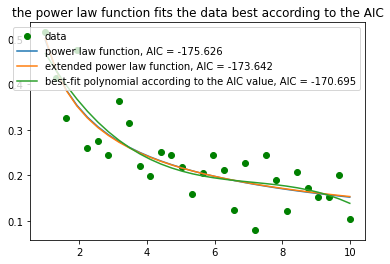

In [11]:
def f1(x, a, b):
    return a * x**(-b)
def f2(x, A, a, b):
    return (A + a * x)**(-b)
a, b =optimize.curve_fit(f1, x, y)
c, d =optimize.curve_fit(f2, x, y)
y1 = AIC(f1(x, a[0], a[1]), y, 2)
y2 = AIC(f2(x, c[0], c[1], c[2]), y, 3)
y3 = AIC(np.polyval(np.polyfit(x, y, deg=3), x), y, 4)

plt.plot(x, y, 'go', label='data')
plt.plot(x, f1(x, a[0], a[1]), 
         label=f'power law function, AIC = {y1:.3f}')
plt.plot(x, f2(x, c[0], c[1], c[2]),
         label=f'extended power law function, AIC = {y2:.3f}')
plt.plot(x, np.polyval(np.polyfit(x, y, deg=3), x), 
         label=f'best-fit polynomial according to the AIC value, AIC = {y3:.3f}')
plt.legend()
plt.title('the power law function fits the data best according to the AIC')